In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# ejemplos para ver donde llegamos con 6000 épocas y un learning rate de 0.001

# para ello, priemro hacemos los imports necesarios y después definimos una 
# función que creará y entrenará la red

# imports necesarios
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# importamos el dataset MNIST y cargamos los datos
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network(learning_rate, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases

  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))

  # por último, construimos el modelo
  pred = tf.nn.softmax(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)

  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # y el learning rate
  new_W = W.assign(W - learning_rate * grad_W)
  new_b = b.assign(b - learning_rate * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              _, _, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                         y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          print("[{}] cost: {}".format(epoch, avg_cost))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

[0] cost: 2.3002741070060444
[1] cost: 2.29565064223496
[2] cost: 2.2910422950913594
[3] cost: 2.286471199044537
[4] cost: 2.281868816811444
[5] cost: 2.2773542154085393
[6] cost: 2.272804995516798
[7] cost: 2.2683119640483715
[8] cost: 2.2637970664284444
[9] cost: 2.2593398777754965
[10] cost: 2.254898354167982
[11] cost: 2.250412751466799
[12] cost: 2.246040525969924
[13] cost: 2.2415841470509403
[14] cost: 2.237202310339831
[15] cost: 2.2329587830808073
[16] cost: 2.2284378671979552
[17] cost: 2.224042983599757
[18] cost: 2.2199021347197077
[19] cost: 2.2155300081470912
[20] cost: 2.2112000360911273
[21] cost: 2.206926661493617
[22] cost: 2.20272434619201
[23] cost: 2.198478220226048
[24] cost: 2.194112686566262
[25] cost: 2.1902427373232536
[26] cost: 2.1855497026776933
[27] cost: 2.181711668179029
[28] cost: 2.177546453364802
[29] cost: 2.1731262401545246
[30] cost: 2.169219462743729
[31] cost: 2.165032431240125
[32] cost: 2.1608709899973477
[33] cost: 2.156993570861283
[34] cost:

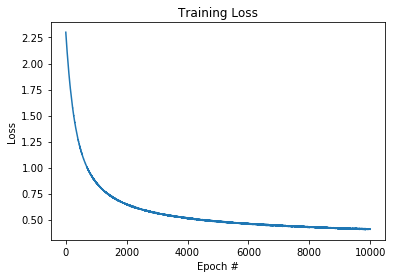

In [0]:
# vamos a probar con 10000 épocas, a ver dónde llega...
learning_rate = 0.00001
n_epochs = 10000
batch_size = 128
train_network(learning_rate, batch_size, n_epochs)